# Question 1
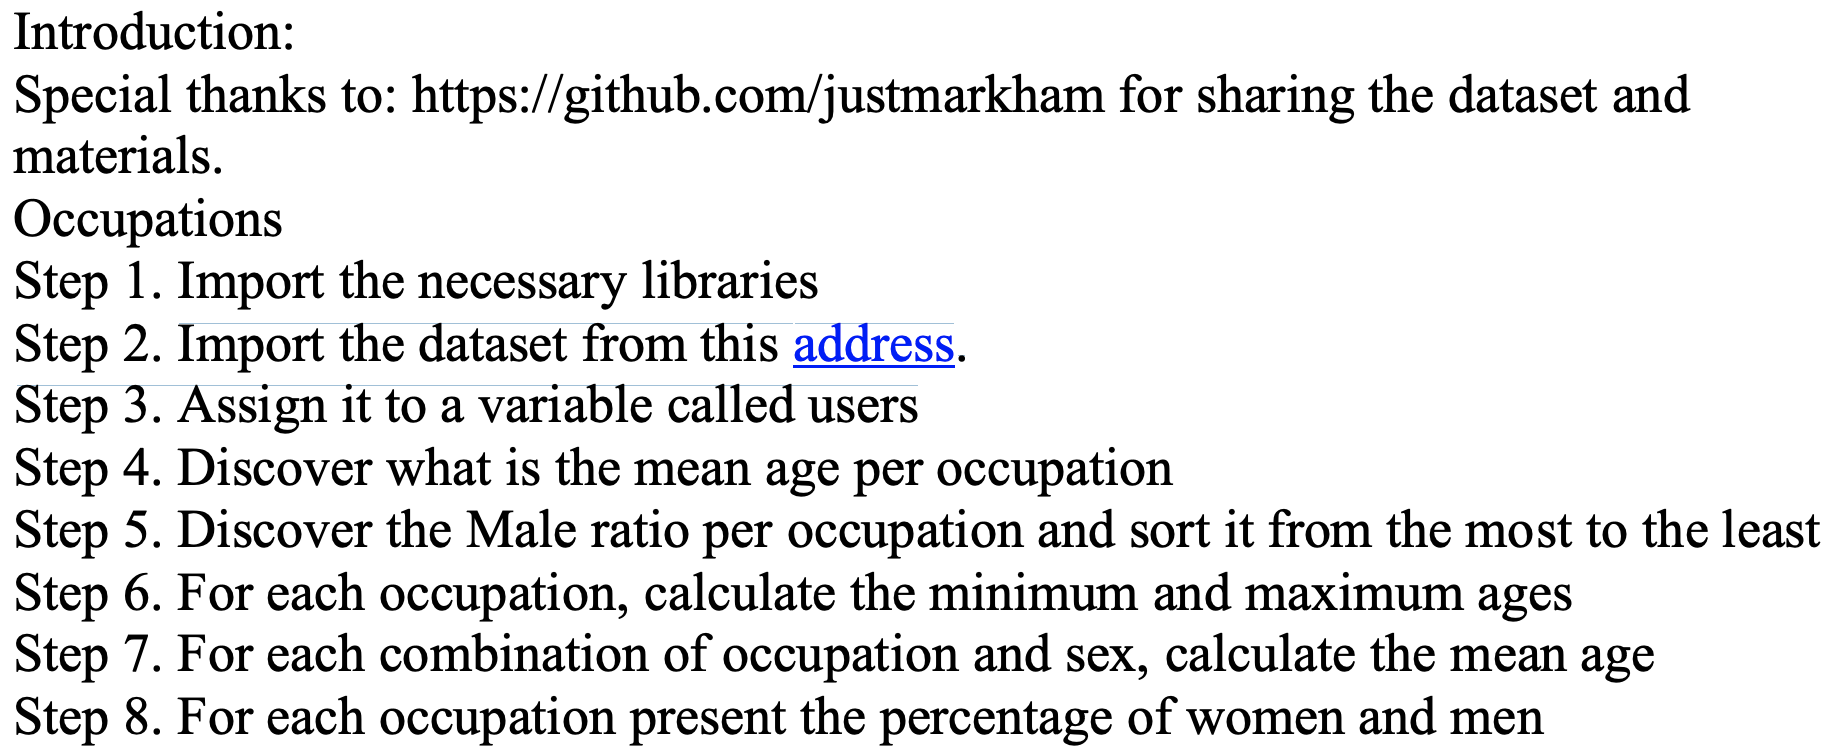

In [1]:
import pandas as pd
users = pd.read_csv('u.user', sep='|')

### Step 4. Discover what is the mean age per occupation

In [2]:
users.groupby(by="occupation")["age"].mean().reset_index()

,occupation,age
0,administrator,38.746835
1,artist,31.392857
2,doctor,43.571429
3,educator,42.010526
4,engineer,36.388060
5,entertainment,29.222222
6,executive,38.718750
7,healthcare,41.562500
8,homemaker,32.571429
9,lawyer,36.750000


### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [3]:
male_ratio = users[users['gender'] == 'M'].groupby(by='occupation').size() / users.groupby(by='occupation').size()
male_ratio

occupation
administrator    0.544304
artist           0.535714
doctor           1.000000
educator         0.726316
engineer         0.970149
entertainment    0.888889
executive        0.906250
healthcare       0.312500
homemaker        0.142857
lawyer           0.833333
librarian        0.431373
marketing        0.615385
none             0.555556
other            0.657143
programmer       0.909091
retired          0.928571
salesman         0.750000
scientist        0.903226
student          0.693878
technician       0.962963
writer           0.577778
dtype: float64

In [4]:
male_ratio = male_ratio.sort_values(ascending=False).reset_index()
male_ratio.columns = ['occupation', 'male_ratio']
male_ratio

,occupation,male_ratio
0,doctor,1.000000
1,engineer,0.970149
2,technician,0.962963
3,retired,0.928571
4,programmer,0.909091
5,executive,0.906250
6,scientist,0.903226
7,entertainment,0.888889
8,lawyer,0.833333
9,salesman,0.750000


### Step 6. For each occupation, calculate the minimum and maximum ages

In [5]:
ages_by_grp = users.groupby(by='occupation')['age'].agg(['min', 'max']).reset_index()
ages_by_grp

,occupation,min,max
0,administrator,21,70
1,artist,19,48
2,doctor,28,64
3,educator,23,63
4,engineer,22,70
5,entertainment,15,50
6,executive,22,69
7,healthcare,22,62
8,homemaker,20,50
9,lawyer,21,53


### Step 7. For each combination of occupation and sex, calculate the mean age

In [6]:
mean_age = users.groupby(by=['occupation', 'gender'])['age'].mean().reset_index()
mean_age

,occupation,gender,age
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


### Step 8. For each occupation present the percentage of women and men

In [7]:
genders = users.groupby(by=['occupation', 'gender']).size()
genders

occupation     gender
administrator  F          36
               M          43
artist         F          13
               M          15
doctor         M           7
educator       F          26
               M          69
engineer       F           2
               M          65
entertainment  F           2
               M          16
executive      F           3
               M          29
healthcare     F          11
               M           5
homemaker      F           6
               M           1
lawyer         F           2
               M          10
librarian      F          29
               M          22
marketing      F          10
               M          16
none           F           4
               M           5
other          F          36
               M          69
programmer     F           6
               M          60
retired        F           1
               M          13
salesman       F           3
               M           9
scientist      F     

In [8]:
genders = genders.unstack()
genders

gender,F,M
occupation,,
administrator,36.0,43.0
artist,13.0,15.0
doctor,NaN,7.0
educator,26.0,69.0
engineer,2.0,65.0
entertainment,2.0,16.0
executive,3.0,29.0
healthcare,11.0,5.0
homemaker,6.0,1.0


In [9]:
ratio = (genders.T / genders.sum(axis=1)).T
ratio

gender,F,M
occupation,,
administrator,0.455696,0.544304
artist,0.464286,0.535714
doctor,NaN,1.000000
educator,0.273684,0.726316
engineer,0.029851,0.970149
entertainment,0.111111,0.888889
executive,0.093750,0.906250
healthcare,0.687500,0.312500
homemaker,0.857143,0.142857


# Question 2
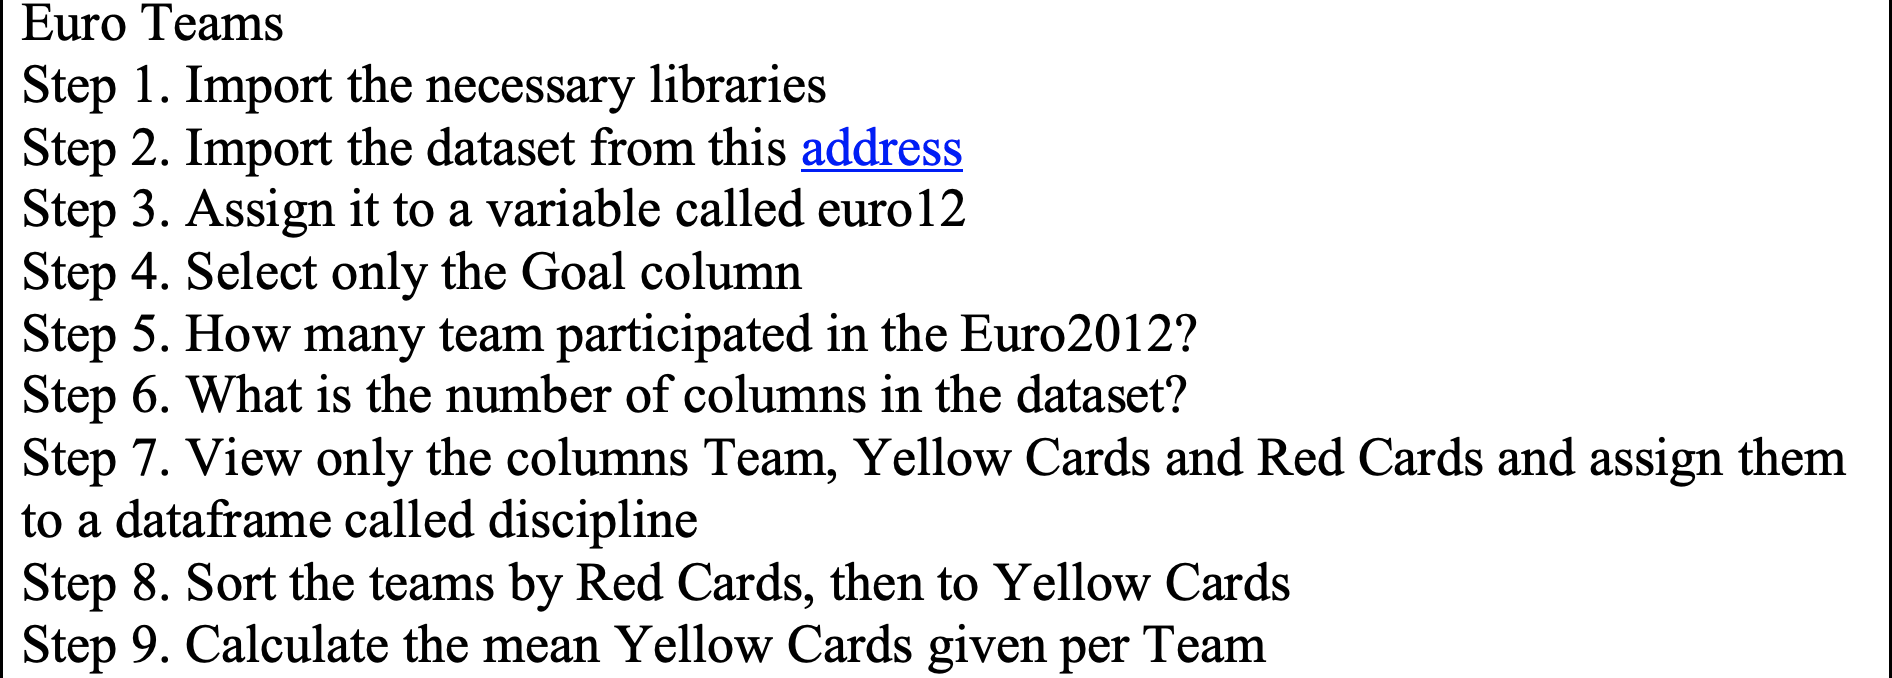
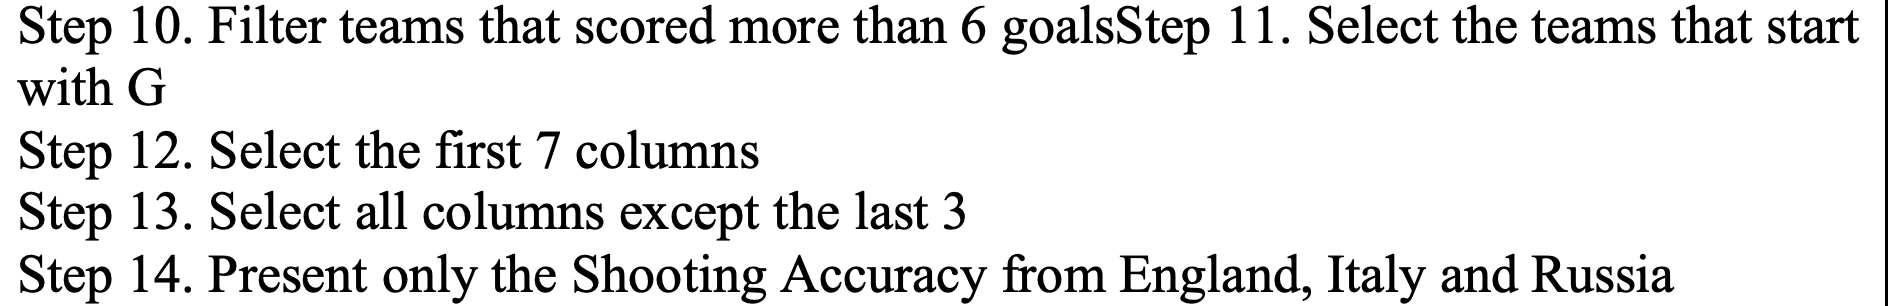

In [10]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### Step 4. Select only the Goal column

In [11]:
euro12['Goals'].values

array([ 4,  4,  4,  5,  3, 10,  5,  6,  2,  2,  6,  1,  5, 12,  5,  2])

### Step 5. How many team participated in the Euro2012?

In [12]:
euro12['Team'].nunique()

16

### Step 6. What is the number of columns in the dataset?

In [13]:
len(euro12.columns)

35

### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [14]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [15]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


### Step 9. Calculate the mean Yellow Cards given per Team

In [16]:
discipline['Yellow Cards'].mean()

7.4375

### Step 10. Filter teams that scored more than 6 goalsStep 

In [17]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11. Select the teams that start with G

In [18]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12. Select the first 7 columns

In [19]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


# Question 3

In [20]:
import numpy as np

### Step 2. Create 3 differents Series, each of length 100, as follows:
* The first a random number from 1 to 4
* The second a random number from 1 to 3
* The third a random number from 10,000 to 30,000

In [21]:
s1 = pd.Series(np.random.randint(1, 5, 100))
s2 = pd.Series(np.random.randint(1, 4, 100))
s3 = pd.Series(np.random.randint(10000, 30001, 100))
s1

0     3
1     1
2     4
3     1
4     2
     ..
95    3
96    3
97    3
98    2
99    1
Length: 100, dtype: int64

### Step 3. Create a DataFrame by joinning the Series by column

In [22]:
df = pd.concat([s1, s2, s3], axis=1)
df

,0,1,2
0,3,1,14998
1,1,3,27665
2,4,1,20851
3,1,2,23100
4,2,2,11138
...,...,...,...
95,3,1,25998
96,3,3,20969
97,3,1,18590
98,2,2,17430


### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [23]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df.columns

Index(['bedrs', 'bathrs', 'price_sqr_meter'], dtype='object')

### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [24]:
bigcolumn = pd.concat([s1, s2, s3], axis=0).to_frame()
bigcolumn.columns = ['bigcolumn']
bigcolumn

,bigcolumn
0,3
1,1
2,4
3,1
4,2
...,...
95,25998
96,20969
97,18590
98,17430


### Step 6. Ops it seems it is going only until index 99. Is it true?

In [25]:
print(bigcolumn.tail())

    bigcolumn
95      25998
96      20969
97      18590
98      17430
99      14070


### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [26]:
bigcolumn.reset_index(drop=True)

,bigcolumn
0,3
1,1
2,4
3,1
4,2
...,...
295,25998
296,20969
297,18590
298,17430


# Question 4
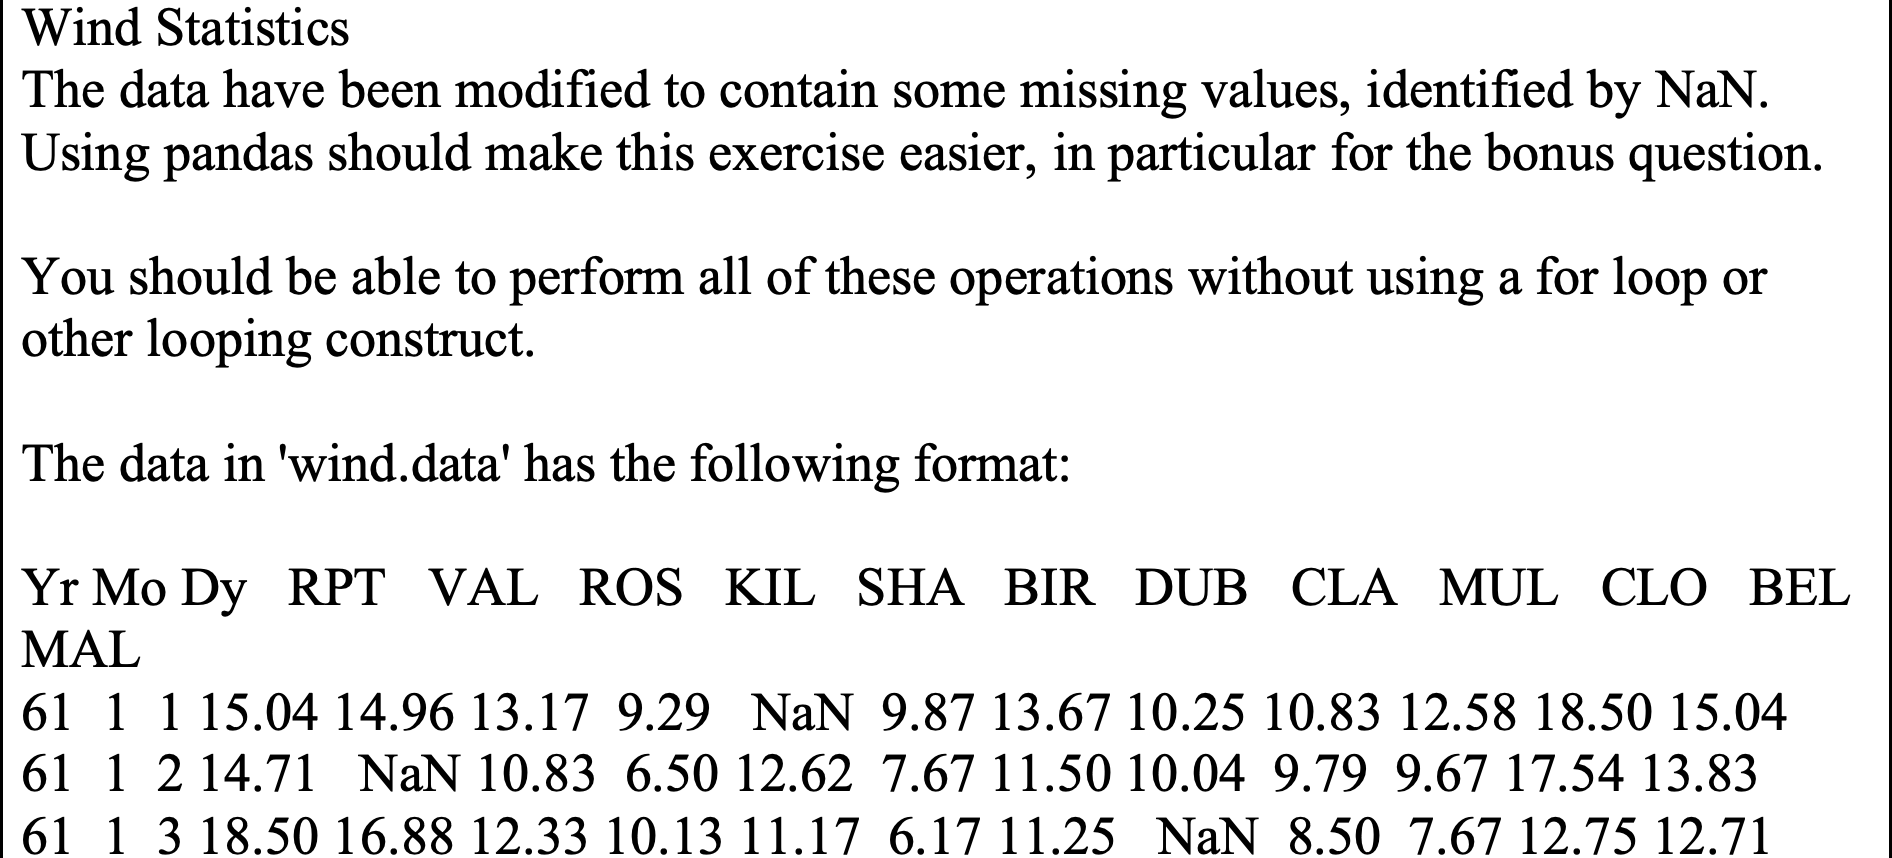
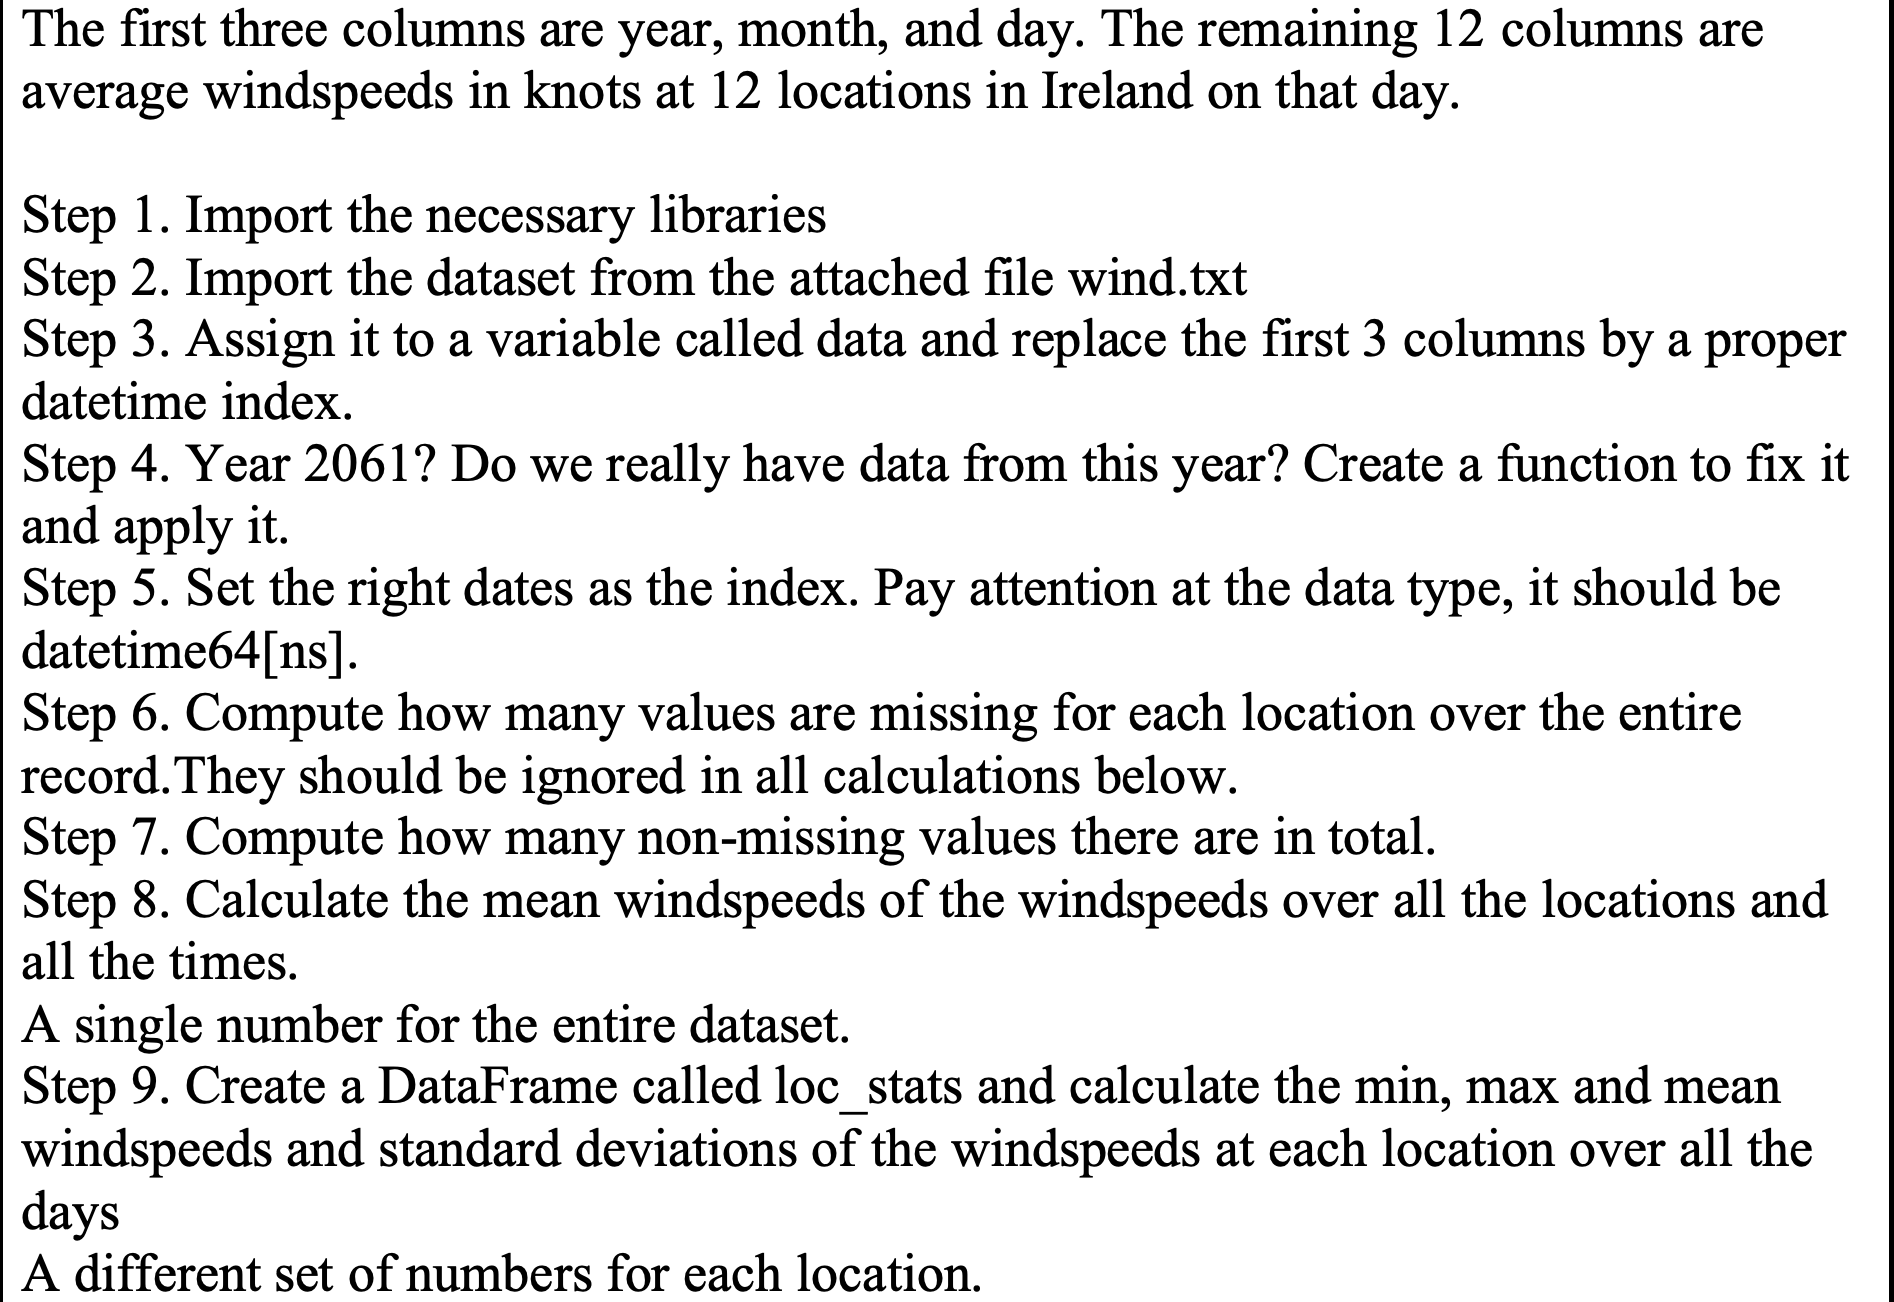
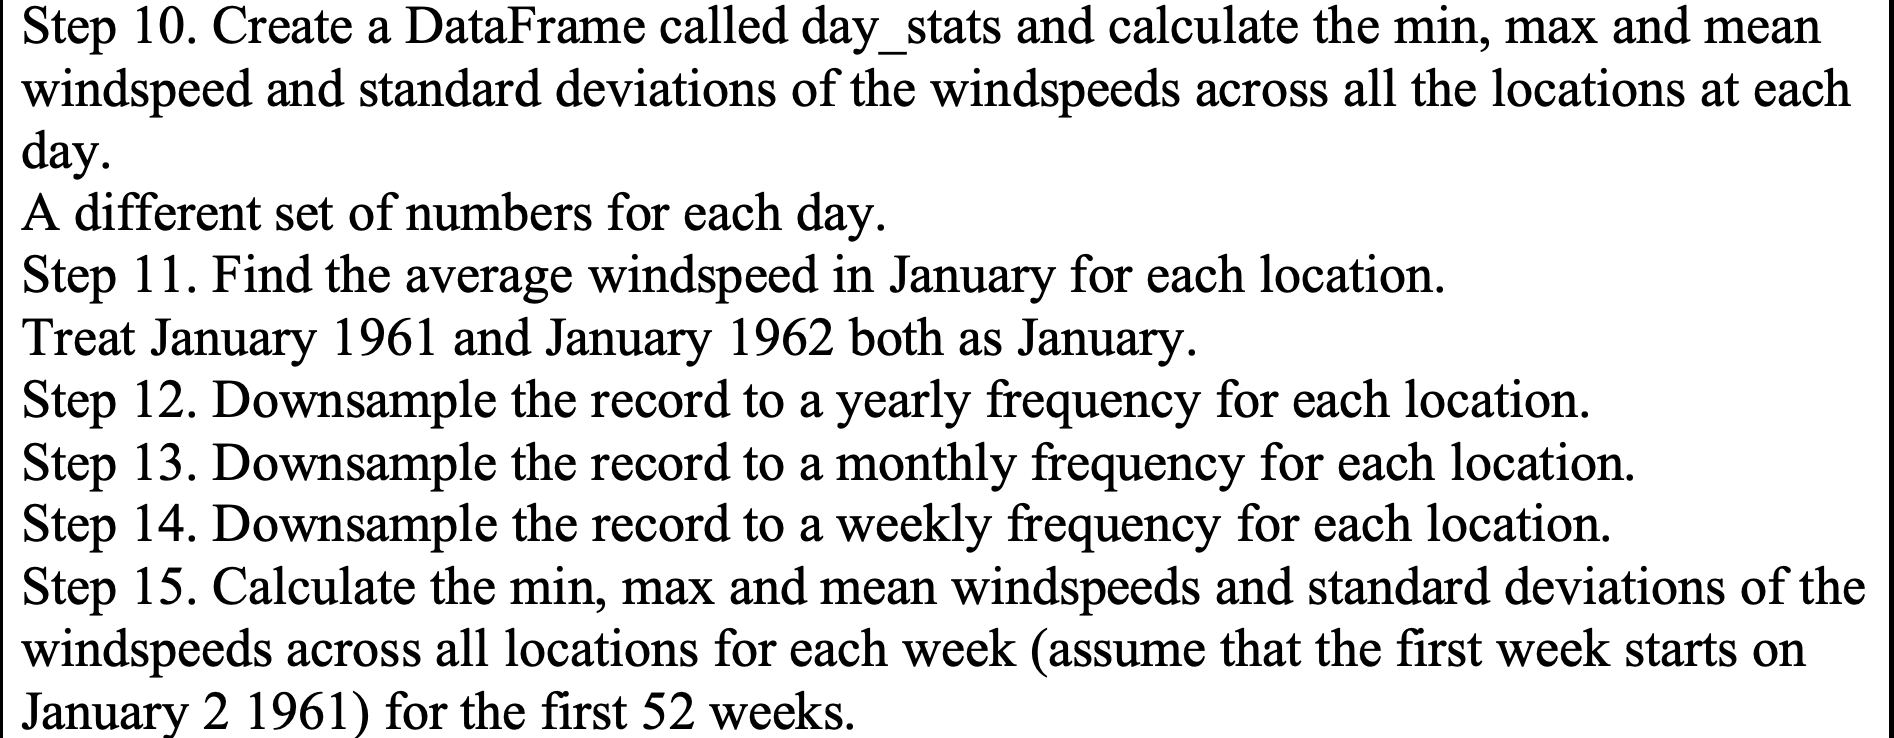

### Step 2. Import the dataset from the attached file wind.txt

In [27]:
data = pd.read_csv("wind.txt", delim_whitespace=True)
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [28]:
data["Date"] = pd.to_datetime(data['Yr'].astype(str) + '-' + data['Mo'].astype(str) + '-' + data['Dy'].astype(str))
data.set_index('Date', inplace=True)
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [29]:
import datetime

def fix_year(date):
    if date.year > 2000:
        new_date = pd.Timestamp(date.year-100, date.month, date.day)
    else:
        new_date = date
    return new_date.date()

data.index = data.index.map(fix_year)

### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [30]:
data.index

Index([1961-01-01, 1961-01-02, 1961-01-03, 1961-01-04, 1961-01-05, 1961-01-06,
       1961-01-07, 1961-01-08, 1961-01-09, 1961-01-10,
       ...
       1978-12-22, 1978-12-23, 1978-12-24, 1978-12-25, 1978-12-26, 1978-12-27,
       1978-12-28, 1978-12-29, 1978-12-30, 1978-12-31],
      dtype='object', name='Date', length=6574)

In [31]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [32]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [33]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [34]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [35]:
total_not_null = data.notnull().sum().sum()
total_not_null

78857

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [36]:
data.mean(skipna=True)

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for all locations.

In [37]:
loc_stats = data.agg(['min', 'max', 'mean', 'std'], axis=0).T
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.

In [38]:
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


### Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [39]:
data[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### Step 12. Downsample the record to a yearly frequency for each location.
### Step 13. Downsample the record to a monthly frequency for each location.
### Step 14. Downsample the record to a weekly frequency for each location.

In [40]:
print("Yearly frequency downsampling:\n%s\n" % (data.resample('A').mean().T))

Yearly frequency downsampling:
Date  1961-12-31  1962-12-31  1963-12-31  1964-12-31  1965-12-31  1966-12-31  \
RPT    12.299583   12.246923   12.813452   12.363661   12.451370   13.461973   
VAL    10.351796   10.110438   10.836986   10.920164   11.075534   11.557205   
ROS    11.362369   11.732712   12.541151   12.104372   11.848767   12.020630   
KIL     6.958227    6.960440    7.330055    6.787787    6.858466    7.345726   
SHA    10.881763   10.657918   11.724110   11.454481   11.024795   11.805041   
BIR     7.729726    7.393068    8.434712    7.570874    7.478110    7.793671   
DUB     9.733923   11.020712   11.075699   10.259153   10.618712   10.579808   
CLA     8.858788    8.793753   10.336548    9.467350    8.879918    8.835096   
MUL     8.647652    8.316822    8.903589    7.789016    7.907425    8.514438   
CLO     9.835577    9.676247   10.224438   10.207951    9.918082    9.768959   
BEL    13.502795   12.930685   13.638877   13.740546   12.964247   14.265836   
MAL    13

In [41]:
print("Monthly frequency downsampling:\n%s\n" % (data.resample('M').mean().T))

Monthly frequency downsampling:
Date  1961-01-31  1961-02-28  1961-03-31  1961-04-30  1961-05-31  1961-06-30  \
RPT    14.841333   16.269286   10.890000   10.722667    9.860968    9.904138   
VAL    11.988333   14.975357   11.296452    9.427667    8.850000    8.520333   
ROS    13.431613   14.441481   10.752903    9.998000   10.818065    8.867000   
KIL     7.736774    9.230741    7.284000    5.830667    5.905333    6.083000   
SHA    11.072759   13.852143   10.509355    8.435000    9.490323   10.824000   
BIR     8.588065   10.937500    8.866774    6.495000    6.574839    6.707333   
DUB    11.184839   11.890714    9.644194    6.925333    7.604000    9.095667   
CLA     9.245333   11.846071    9.829677    7.094667    8.177097    8.849333   
MUL     9.085806   11.821429   10.294138    7.342333    8.039355    9.086667   
CLO    10.107419   12.714286   11.251935    7.237000    8.499355    9.940333   
BEL    13.880968   18.583214   16.410968   11.147333   11.900323   13.995000   
MAL    1

In [42]:
print("Weekly frequency downsampling:\n%s\n" % (data.resample('W').mean().T))

Weekly frequency downsampling:
Date  1961-01-01  1961-01-08  1961-01-15  1961-01-22  1961-01-29  1961-02-05  \
RPT        15.04   13.541429   12.468571   13.204286   19.880000   16.827143   
VAL        14.96   11.486667    8.967143    9.862857   16.141429   15.460000   
ROS        13.17   10.487143   11.958571   12.982857   18.225714   12.618571   
KIL         9.29    6.417143    4.630000    6.328571   12.720000    8.247143   
SHA          NaN    9.474286    7.351429    8.966667   17.432857   13.361429   
BIR         9.87    6.435714    5.072857    7.417143   14.828571    9.107143   
DUB        13.67   11.061429    7.535714    9.257143   15.528571   12.204286   
CLA        10.25    6.616667    6.820000    7.875714   15.160000    8.548571   
MUL        10.83    8.434286    5.712857    7.145714   14.480000    9.821429   
CLO        12.58    8.497143    7.571429    8.124286   15.640000    9.460000   
BEL        18.50   12.481429   11.125714    9.821429   20.930000   14.012857   
MAL      

### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [43]:
print(data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[1:53].T.unstack())

Date 1961-01-08                             1961-01-15                    \
            min    max       mean       std        min    max       mean   
RPT       10.58  18.50  13.541429  2.631321       9.04  19.75  12.468571   
VAL        6.63  16.88  11.486667  3.949525       3.54  12.08   8.967143   
ROS        7.62  12.33  10.487143  1.604761       7.08  19.50  11.958571   
KIL        4.58  10.13   6.417143  1.810743       0.67  10.54   4.630000   
SHA        4.54  12.62   9.474286  3.251660       2.29  10.37   7.351429   
BIR        2.88   8.33   6.435714  2.059546       0.96   9.46   5.072857   
DUB        8.63  14.29  11.061429  1.872222       2.50  15.54   7.535714   
CLA        1.79  10.04   6.616667  3.098404       0.58  11.50   6.820000   
MUL        5.83  10.92   8.434286  1.722255       0.50  10.37   5.712857   
CLO        5.88  10.46   8.497143  1.704941       2.67  14.58   7.571429   
BEL        5.46  17.54  12.481429  4.349139       5.25  20.71  11.125714   
MAL       10

# Question 5
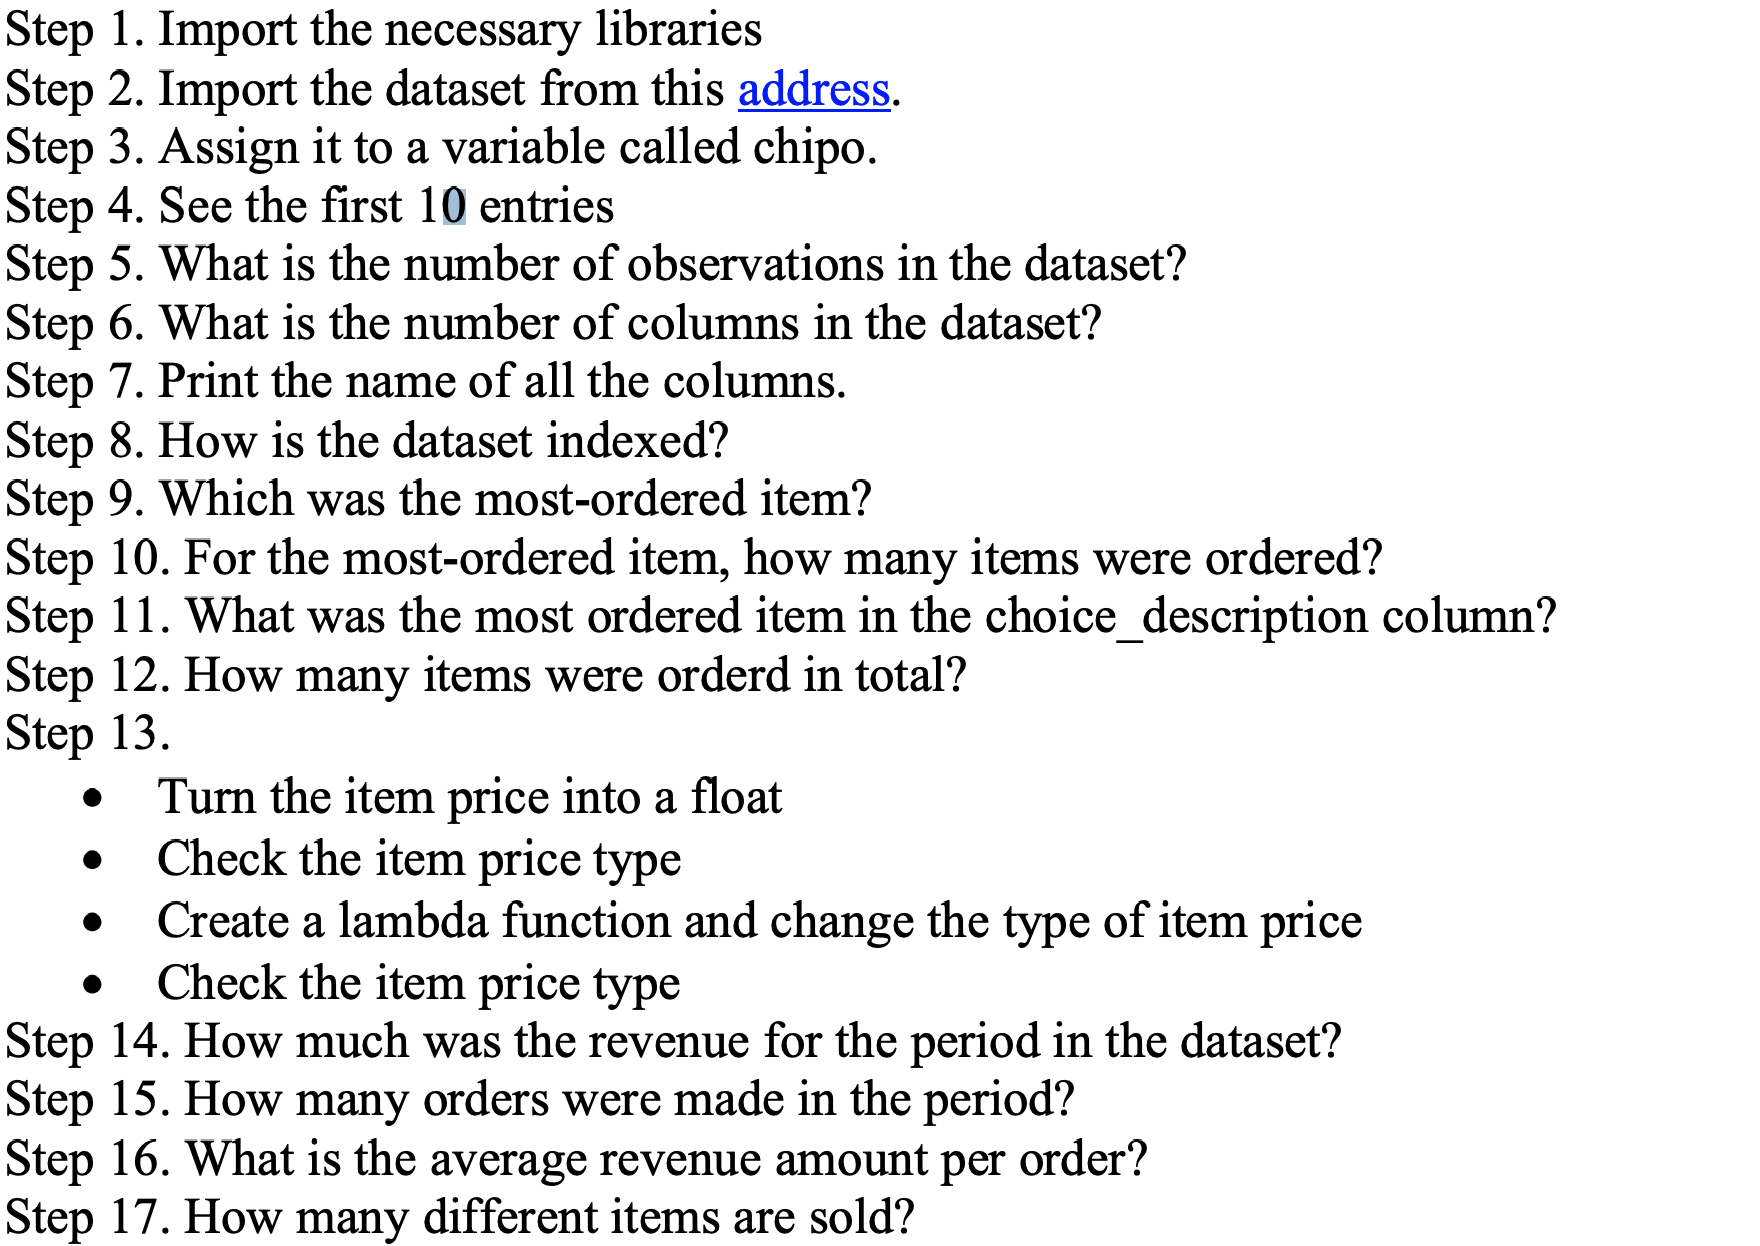

### Step 3. Assign it to a variable called chipo.

In [44]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [45]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [46]:
chipo.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

### Step 6. What is the number of columns in the dataset?

In [47]:
chipo.columns.size

5

### Step 7. Print the name of all the columns.

In [48]:
chipo.columns.to_list()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

### Step 8. How is the dataset indexed?

In [49]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item?

In [50]:
tmp = chipo.groupby('item_name').sum("quantity").sort_values(by="quantity", ascending=False)[["quantity"]]
tmp.index[0]

'Chicken Bowl'

### Step 10. For the most-ordered item, how many items were ordered?

In [51]:
tmp.head(1).values[0][0]

761

### Step 11. What was the most ordered item in the choice_description column?

In [52]:
chipo.groupby('choice_description').sum().sort_values(by='quantity', ascending=False).index[0]

'[Diet Coke]'

### Step 12. How many items were orderd in total?

In [53]:
chipo['quantity'].sum()

4972

### Step 13.
* Turn the item price into a float
* Check the item price type
* Create a lambda function and change the type of item price
* Check the item price type

In [54]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')
chipo['item_price'] = chipo['item_price'].str.replace('$', '', regex=False).astype(float)
chipo['item_price'].dtype

dtype('float64')

In [55]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['item_price'].dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [56]:
chipo['total_cost'] = chipo['quantity'] * chipo['item_price']
chipo['total_cost'].sum()

39237.02

### Step 15. How many orders were made in the period?

In [57]:
chipo['order_id'].nunique()

1834

### Step 16. What is the average revenue amount per order?

In [58]:
chipo['total_cost'].sum() / chipo['order_id'].nunique()

21.39423118865867

### Step 17. How many different items are sold?

In [59]:
chipo['item_name'].nunique()

50

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

Don't forget to label your axes!

In [88]:
import matplotlib.pyplot as plt

df = pd.read_csv("us-marriages-divorces-1867-2014.csv")
df['Marriages_per_capita'] = df['Marriages'] / df['Population']
df['Divorces_per_capita'] = df['Divorces'] / df['Population']
df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,Marriages_per_capita,Divorces_per_capita
0,1867,357000.0,10000.0,36970000,9.7,0.3,0.009656,0.000270
1,1868,345000.0,10000.0,37885000,9.1,0.3,0.009107,0.000264
2,1869,348000.0,11000.0,38870000,9.0,0.3,0.008953,0.000283
3,1870,352000.0,11000.0,39905000,8.8,0.3,0.008821,0.000276
4,1871,359000.0,12000.0,41010000,8.8,0.3,0.008754,0.000293
...,...,...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8,0.007282,0.002837
141,2008,2157000.0,844000.0,304543000,7.1,2.8,0.007083,0.002771
142,2009,2080000.0,840000.0,307240000,6.8,2.7,0.006770,0.002734
143,2010,2096000.0,872000.0,309776000,6.8,2.8,0.006766,0.002815


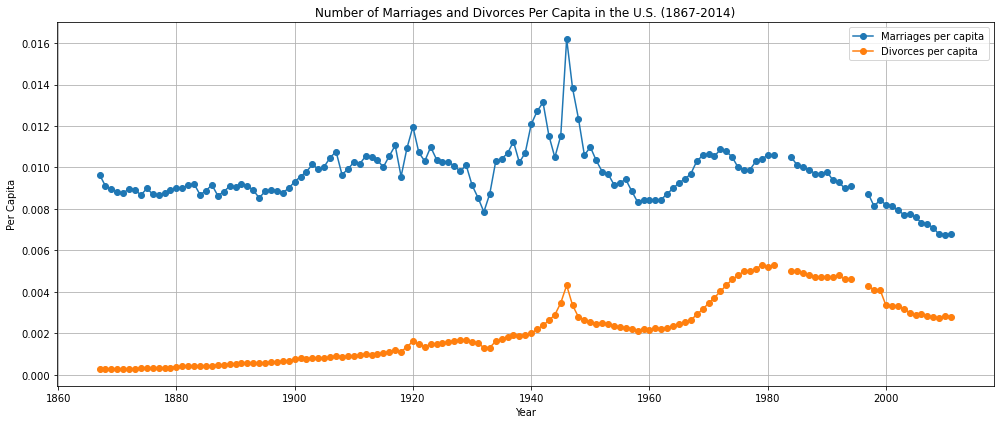

In [89]:
plt.figure(figsize=(14, 6))
plt.plot(df['Year'], df['Marriages_per_capita'], label='Marriages per capita', marker='o')
plt.plot(df['Year'], df['Divorces_per_capita'], label='Divorces per capita', marker='o')
plt.title('Number of Marriages and Divorces Per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

Don't forget to label your axes!

In [90]:
selected_years = df[df['Year'].isin([1900, 1950, 2000])].copy()
selected_years

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,Marriages_per_capita,Divorces_per_capita
33,1900,709000.0,56000.0,76094000,9.3,0.7,0.009317,0.000736
83,1950,1667000.0,385000.0,151684000,11.0,2.5,0.010990,0.002538
133,2000,2315000.0,944000.0,282398000,8.2,3.3,0.008198,0.003343


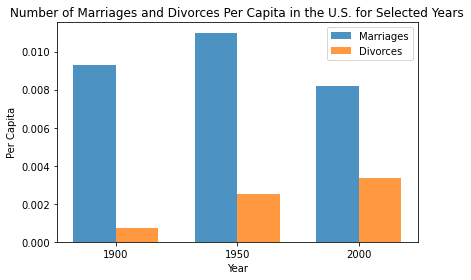

In [91]:
bar_width = 0.35
index = range(len(selected_years))

plt.bar(index, selected_years['Marriages_per_capita'], bar_width, label='Marriages', alpha=0.8)
plt.bar([i+bar_width for i in index], selected_years['Divorces_per_capita'], bar_width, label='Divorces', alpha=0.8)

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces Per Capita in the U.S. for Selected Years')
plt.xticks([i + bar_width/2 for i in index], selected_years['Year'])
plt.legend()

plt.tight_layout()
plt.show()

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

Don't forget to label your axes!

In [85]:
df = pd.read_csv("actor_kill_counts.csv")
df = df.sort_values(by='Count', ascending=False)
df

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


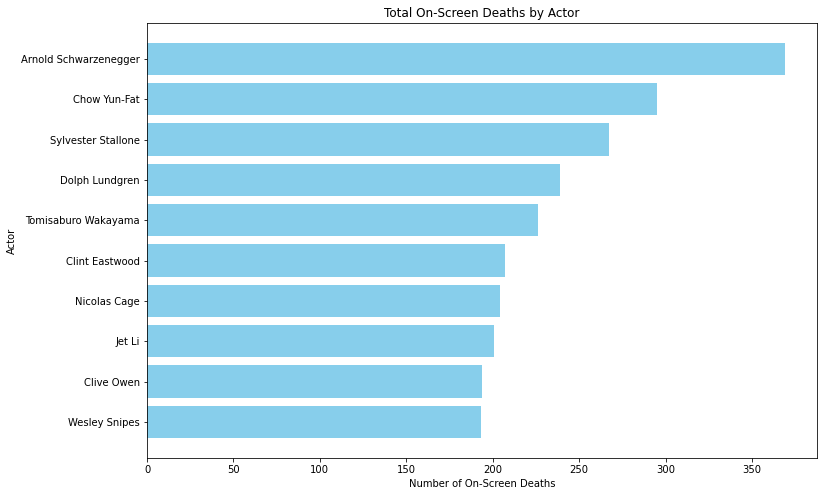

In [68]:
plt.figure(figsize=(12, 8))
plt.barh(df['Actor'], df['Count'], color='skyblue')
plt.xlabel('Number of On-Screen Deaths')
plt.ylabel('Actor')
plt.title('Total On-Screen Deaths by Actor')
plt.gca().invert_yaxis()
plt.show()

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [84]:
df = pd.read_csv("roman-emperor-reigns.csv")
df

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


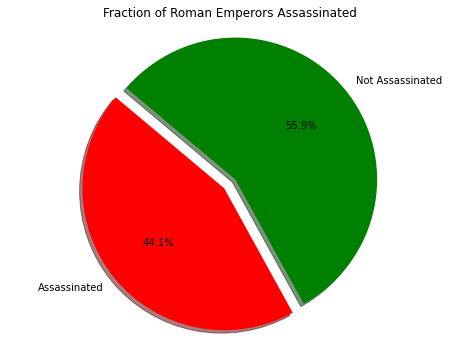

In [71]:
assassinated = df['Cause_of_Death'].isin(['Assassinated', 'Possibly assassinated']).sum()
not_assassinated = df.shape[0] - assassinated

labels = 'Assassinated', 'Not Assassinated'
sizes = [assassinated, not_assassinated]
colors = ['red', 'green']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Fraction of Roman Emperors Assassinated')
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Don't forget to label your axes! 

Color each dot according to its year.

In [82]:
df = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
df

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


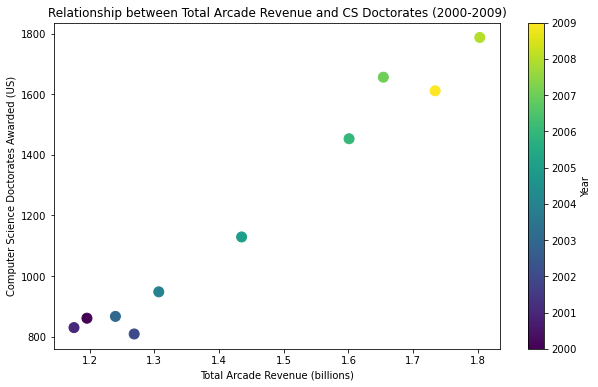

In [83]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Total Arcade Revenue (billions)'], 
                      df['Computer Science Doctorates Awarded (US)'],
                      c=df['Year'], cmap='viridis', s=100)

cbar = plt.colorbar(scatter)
cbar.set_label('Year')

plt.title("Relationship between Total Arcade Revenue and CS Doctorates (2000-2009)")
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")
plt.show()